In [2]:
#!pip install gensim

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import warnings
warnings.filterwarnings("ignore")

C:\Users\esra.erkan\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
data = pd.read_excel("./veriler/keyboard_mouse/dell_km636_wireless_keyword_mouse.xlsx")
data.head()

,product,name,date,title,rating,text
0,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Andy. The Captain,"May 20, 2018",Simply don't buy it... There is no excuse for ...,1,This keyboard shouldn't be sold. I don't know ...
1,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Dan Neuwirth,"May 11, 2018","Feels good, but has its flaws.",2,"I'm really torn over this. On the one hand, i..."
2,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Manvendra Singh,"December 26, 2017",Simply amazing and great value for money.,5,I work in IT industry for over ten years so I...
3,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,IJK,"March 31, 2019",Skips letters..read update,5,Update:I actually went to the dell website and...
4,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,SGoldfarb,"August 15, 2018",Decent keyboard - major drawbacks though.,2,So I got a new job where I would be working wi...


In [5]:
data.date = pd.to_datetime(data['date']) 

In [6]:
data.head()

,product,name,date,title,rating,text
0,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Andy. The Captain,2018-05-20,Simply don't buy it... There is no excuse for ...,1,This keyboard shouldn't be sold. I don't know ...
1,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Dan Neuwirth,2018-05-11,"Feels good, but has its flaws.",2,"I'm really torn over this. On the one hand, i..."
2,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Manvendra Singh,2017-12-26,Simply amazing and great value for money.,5,I work in IT industry for over ten years so I...
3,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,IJK,2019-03-31,Skips letters..read update,5,Update:I actually went to the dell website and...
4,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,SGoldfarb,2018-08-15,Decent keyboard - major drawbacks though.,2,So I got a new job where I would be working wi...


### Data cleaning - preprocessing

In [7]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
  
# single word lemmatization examples
list1 = ['kites', 'babies', 'dogs', 'flying', 'smiling', 
         'driving', 'died', 'tried', 'feet']
for words in list1:
    print(words + " ---> " + wnl.lemmatize(words))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esra.erkan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


kites ---> kite
babies ---> baby
dogs ---> dog
flying ---> flying
smiling ---> smiling
driving ---> driving
died ---> died
tried ---> tried
feet ---> foot


In [8]:
for words in list1:
    print(words + " ---> " + wnl.lemmatize(words,pos='v' ))

kites ---> kit
babies ---> baby
dogs ---> dog
flying ---> fly
smiling ---> smile
driving ---> drive
died ---> die
tried ---> try
feet ---> feet


In [9]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk

#stemmer = SnowballStemmer('english')
#stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return " ".join(result)

In [10]:
processed_docs = data['text'].map(preprocess)
processed_docs[:5]

0    keyboard shouldn sell know dell manage post am...
1    tear hand feel nicely design key feel great co...
2    work industry years keyboards mouse expensive ...
3    update actually go dell website download drive...
4    work multiple devices contract issue dell site...
Name: text, dtype: object

In [11]:
data['cleaned_text'] = processed_docs

In [12]:
data.head()

,product,name,date,title,rating,text,cleaned_text
0,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Andy. The Captain,2018-05-20,Simply don't buy it... There is no excuse for ...,1,This keyboard shouldn't be sold. I don't know ...,keyboard shouldn sell know dell manage post am...
1,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Dan Neuwirth,2018-05-11,"Feels good, but has its flaws.",2,"I'm really torn over this. On the one hand, i...",tear hand feel nicely design key feel great co...
2,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,Manvendra Singh,2017-12-26,Simply amazing and great value for money.,5,I work in IT industry for over ten years so I...,work industry years keyboards mouse expensive ...
3,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,IJK,2019-03-31,Skips letters..read update,5,Update:I actually went to the dell website and...,update actually go dell website download drive...
4,Dell KM636 Wireless Keyboard & Mouse Combo (5W...,SGoldfarb,2018-08-15,Decent keyboard - major drawbacks though.,2,So I got a new job where I would be working wi...,work multiple devices contract issue dell site...


### Data Visualization

In [13]:
data.rating.value_counts().sort_index(ascending=False)

5    22
4     5
3     4
2    11
1     8
Name: rating, dtype: int64

In [14]:
from itertools import chain
a = [(1, ), (2, 3), (4, 5, 6)]

In [15]:
list(chain(a))

[(1,), (2, 3), (4, 5, 6)]

In [16]:
list(chain(*a))

[1, 2, 3, 4, 5, 6]

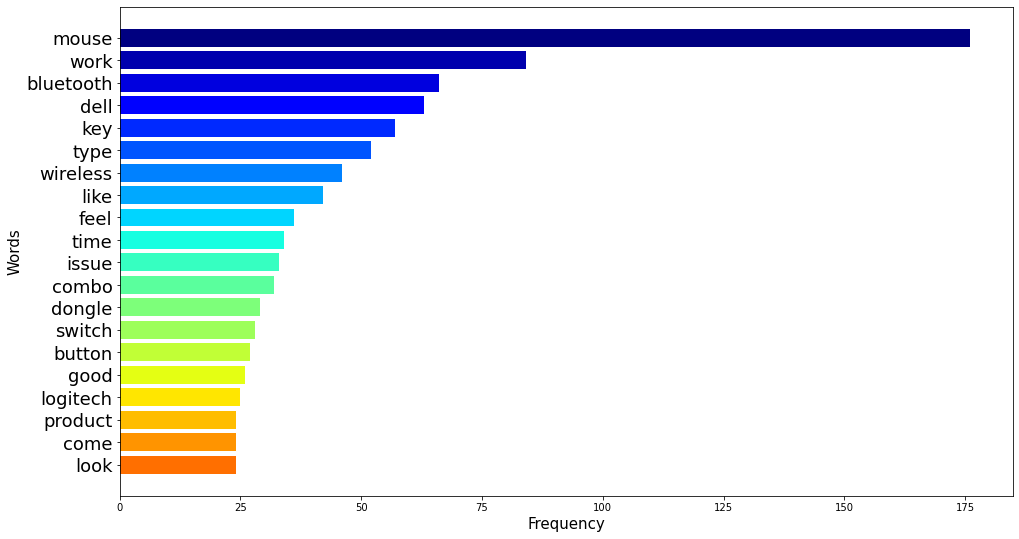

In [17]:
from collections import Counter

words = [x.split() for x in data.cleaned_text.values]
from itertools import chain
cx = Counter(list(chain(*words)))
top = 20
most_common = cx.most_common()[1:]
x, y = zip(*most_common[:top])
fig, ax = plt.subplots(1, figsize=(16,9))
ax.barh(range(len(x)), y, color = plt.cm.jet(np.linspace(0, 1, 25)))
ax.invert_yaxis()
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Words' , fontsize=15)
ax.set_yticks(np.arange(len(x)))
ax.set_yticklabels(x, fontsize=18)
plt.show()

In [19]:
!pip install wordcloud

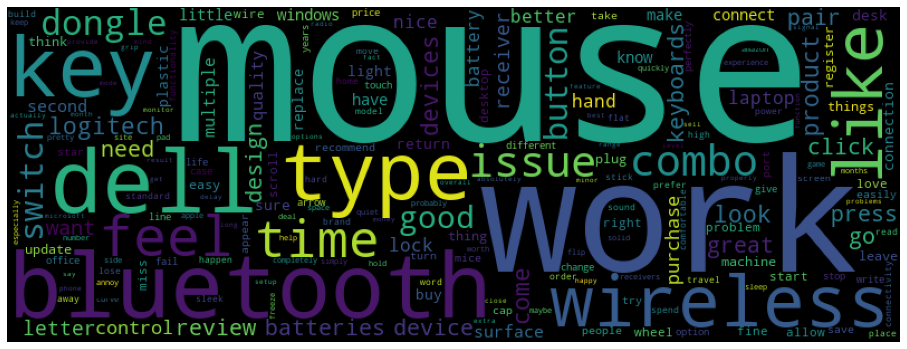

In [20]:
from wordcloud import WordCloud

d = {}
for k,v in most_common[:]:
    d[k] = int(v)

wc = WordCloud(relative_scaling=.5, width=800, height=300, background_color='black',stopwords=gensim.parsing.preprocessing.STOPWORDS).generate_from_frequencies(d)
fig = plt.figure(1,figsize=(16,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [21]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures, TrigramCollocationFinder, TrigramAssocMeasures

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(list(chain(*words)), 2)


for bigram in finder.nbest(bigram_measures.likelihood_ratio, 20):
    print(bigram)

bgs2 = nltk.bigrams(list(chain(*words))) 
fdist2 = nltk.FreqDist(bgs2)
rslt2 = pd.DataFrame(Counter(fdist2).most_common(20),columns=['Word', 'Frequency']).set_index('Word')
print('=' * 60)
print(rslt2)
print('=' * 60)

('keyboard', 'mouse')
('cap', 'lock')
('scroll', 'wheel')
('save', 'power')
('option', 'allow')
('device', 'save')
('allow', 'turn')
('sure', 'option')
('battery', 'life')
('power', 'offhid')
('turn', 'device')
('work', 'perfectly')
('read', 'review')
('line', 'site')
('dock', 'station')
('arrow', 'key')
('offhid', 'compliant')
('direct', 'line')
('highly', 'recommend')
('plug', 'port')
                      Frequency
Word                           
(keyboard, mouse)            51
(mouse, keyboard)            18
(wireless, keyboard)         11
(mouse, combo)                9
(cap, lock)                   9
(keyboard, work)              8
(scroll, wheel)               8
(work, perfectly)             7
(dell, keyboard)              7
(wireless, mouse)             7
(device, save)                7
(arrow, key)                  6
(battery, life)               6
(work, fine)                  6
(sure, option)                6
(option, allow)               6
(allow, turn)                 6
(t

In [22]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder_ = TrigramCollocationFinder.from_words(list(chain(*words)), 3)


for trigram in finder_.nbest(trigram_measures.likelihood_ratio, 20):
    print(trigram)
    
bgs3 = nltk.trigrams(list(chain(*words))) 
fdist3 = nltk.FreqDist(bgs3)
rslt3 = pd.DataFrame(Counter(fdist3).most_common(20),columns=['Word', 'Frequency']).set_index('Word')
print('=' * 60)
print(rslt3)
print('=' * 60)

('keyboard', 'mouse', 'combo')
('wireless', 'keyboard', 'mouse')
('option', 'allow', 'turn')
('device', 'save', 'power')
('sure', 'option', 'allow')
('turn', 'device', 'save')
('wire', 'keyboard', 'mouse')
('keyboard', 'mouse', 'insert')
('keyboard', 'mouse', 'keyboard')
('switch', 'keyboard', 'mouse')
('mouse', 'keyboard', 'mouse')
('keyboard', 'mouse', 'combos')
('design', 'keyboard', 'mouse')
('keyboard', 'mouse', 'look')
('lock', 'cap', 'lock')
('spend', 'keyboard', 'mouse')
('allow', 'turn', 'device')
('keyboard', 'keyboard', 'mouse')
('adaptor', 'keyboard', 'mouse')
('alternative', 'keyboard', 'mouse')
                              Frequency
Word                                   
(keyboard, mouse, combo)              8
(wireless, keyboard, mouse)           7
(sure, option, allow)                 6
(option, allow, turn)                 6
(allow, turn, device)                 6
(turn, device, save)                  6
(device, save, power)                 6
(switch, keyboard, mouse

# ___end of data_cleaning___

#### ___Esra Erkan_June 10, 2021___